# Solving real world problems: Mexican Numbering plan

Mexico in August 2019 will change their national numbering plan to a closed fixed length (10 digit) 
numbering plan: https://www.itu.int/dms_pub/itu-t/oth/02/02/T020200008A0003PDFE.pdf

While previously cellphone numbers were easily identifiable by their common prefix
in the new numbering plan cellphone numbers share the same prefix(es) as the other geographical numbers. 
Enterprise admins still want to be able to determine which number are cellphone numbers to be able to implement
differentiated class of service (with or without access to cellphone numbers).

One way to achieve that is to provision blocking translation patterns in UCM to block access to mobile cellphone number ranges. The question remains: What are the cellphone number ranges?

To answer that question the Mexcian numbering plan authority publishes a CSV file with all number ranges in Mexico at: https://sns.ift.org.mx:8081/sns-frontend/planes-numeracion/descarga-publica.xhtml. This list is continuously updated.

Why not try to build a Pythin script that:
* pulls the latest numbering plan from the website
* identifies the mobile ranges
* summarizes these ranges to a minimal set of patterns
* provisions blocking translation patterns all of these patterns

The file `mxnumplan.py` is such a script which when executed directly takes a number of arguments from the CLI and then executes above operations accordingly.

Instead of invoking the script from the CLI (feel free to try that if you have Python installed) we can also invoke code from the script programmatically.

**To do**: review the `mxnumplan.py` source file. Take particular note of the `ucmaxl` module that is imported by that file. The `ucmaxl` module is a helper based on `zeep` which implements a series of helper functions to simplify the use of AXL for provisioning purposes. This is meant as an example and can be the basis for future own developments.

**To do**: Execute the following cell to execute the import and some basic settings.

In [1]:
import mxnumplan
import urllib3

UCM_PUBLISHER = 'us-cm-pub.ent-pa.com'
AXL_USER = 'administrator'
AXL_PASSWORD = '*******'

# from connection_parameters import *

# disable warnings for HTTPS sessions w/ diabled cert validation
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

**To do**: Execute the next cell to read the mobile patterns from the web and create the summarizations

In [2]:
patterns = mxnumplan.patterns_from_web()
patterns = mxnumplan.optimize_patterns(patterns)

print(f'summarized to {len(patterns)} patterns')    

Accessing numbering plan information web site at https://sns.ift.org.mx:8081/sns-frontend/planes-numeracion/descarga-publica.xhtml ...
Requesting ZIP from web site...
Reading ZIP 'pnn_Publico_10_09_2019.zip’ from web site...
Reading number ranges from pnn_Publico_10_09_2019.csv...
got 64461 mobile patterns
sorting patterns...
expanding patterns...
expanded to 153570 patterns
Summarize 10: 153570->153570
Summarize 9: 153570->153570
Summarize 8: 153570->136830
Summarize 7: 136830->49051
Summarize 6: 49051->9457
Summarize 5: 9457->8130
Summarize 4: 8130->8122
Summarize 3: 8122->8122
summarized to 8122 patterns


**To Do**: Execute the following cell to print the 1st few patterns

In [3]:
print('\n'.join(f'{p.for_ucm}' for p in patterns[:10]))

\+522211[012346789]XXXXX
\+5222115[012356789]XXXX
\+52221154[01234]XXX
\+522212[012345678]XXXXX
\+5222129[012456789]XXXX
\+52221293[0123]XXX
\+522213[012356789]XXXXX
\+5222134[012456789]XXXX
\+52221343[012]XXX
\+522214[012345789]XXXXX


**To Do**: Execute the next cell to actually provision the patterns on UCM. You can always interrupt execution of the code by clickling the square "stop" button above: 
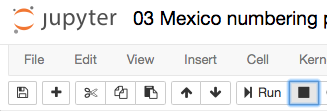

In [4]:
# in the interest of execution time we will only consider the 1st 100 patterns for the actual provisioning
patterns = patterns[:100]

mxnumplan.provision_patterns(ucm=UCM_PUBLISHER, user=AXL_USER, password=AXL_PASSWORD, route_list_name=None,
                             read_only=False, patterns=patterns)

Partition mobile exists.
0 patterns exist in UCM
100 new patterns need to be provisioned
0 patterns need to be removed
adding patterns...
Adding pattern \+522211[012346789]XXXXX
Adding pattern \+5222115[012356789]XXXX
Adding pattern \+52221154[01234]XXX
Adding pattern \+522212[012345678]XXXXX
Adding pattern \+5222129[012456789]XXXX
Adding pattern \+52221293[0123]XXX
Adding pattern \+522213[012356789]XXXXX
Adding pattern \+5222134[012456789]XXXX
Adding pattern \+52221343[012]XXX
Adding pattern \+522214[012345789]XXXXX
Adding pattern \+5222146[012456789]XXXX
Adding pattern \+52221463[012345]XXX
Adding pattern \+522215[024]XXXXX
Adding pattern \+5222151[012356789]XXXX
Adding pattern \+52221514[0123]XXX
Adding pattern \+5222153[01256789]XXXX
Adding pattern \+52221533[012345678]XXX
Adding pattern \+52221534[01]XXX
Adding pattern \+5222155[01234]XXXX
Adding pattern \+522221[01]XXXXX
Adding pattern \+5222212[01345678]XXXX
Adding pattern \+522221225XXX
Adding pattern \+5222213[1234569]XXXX
Add

**To Do**: Verify that the patterns are actually added using the UCM admin GUI.

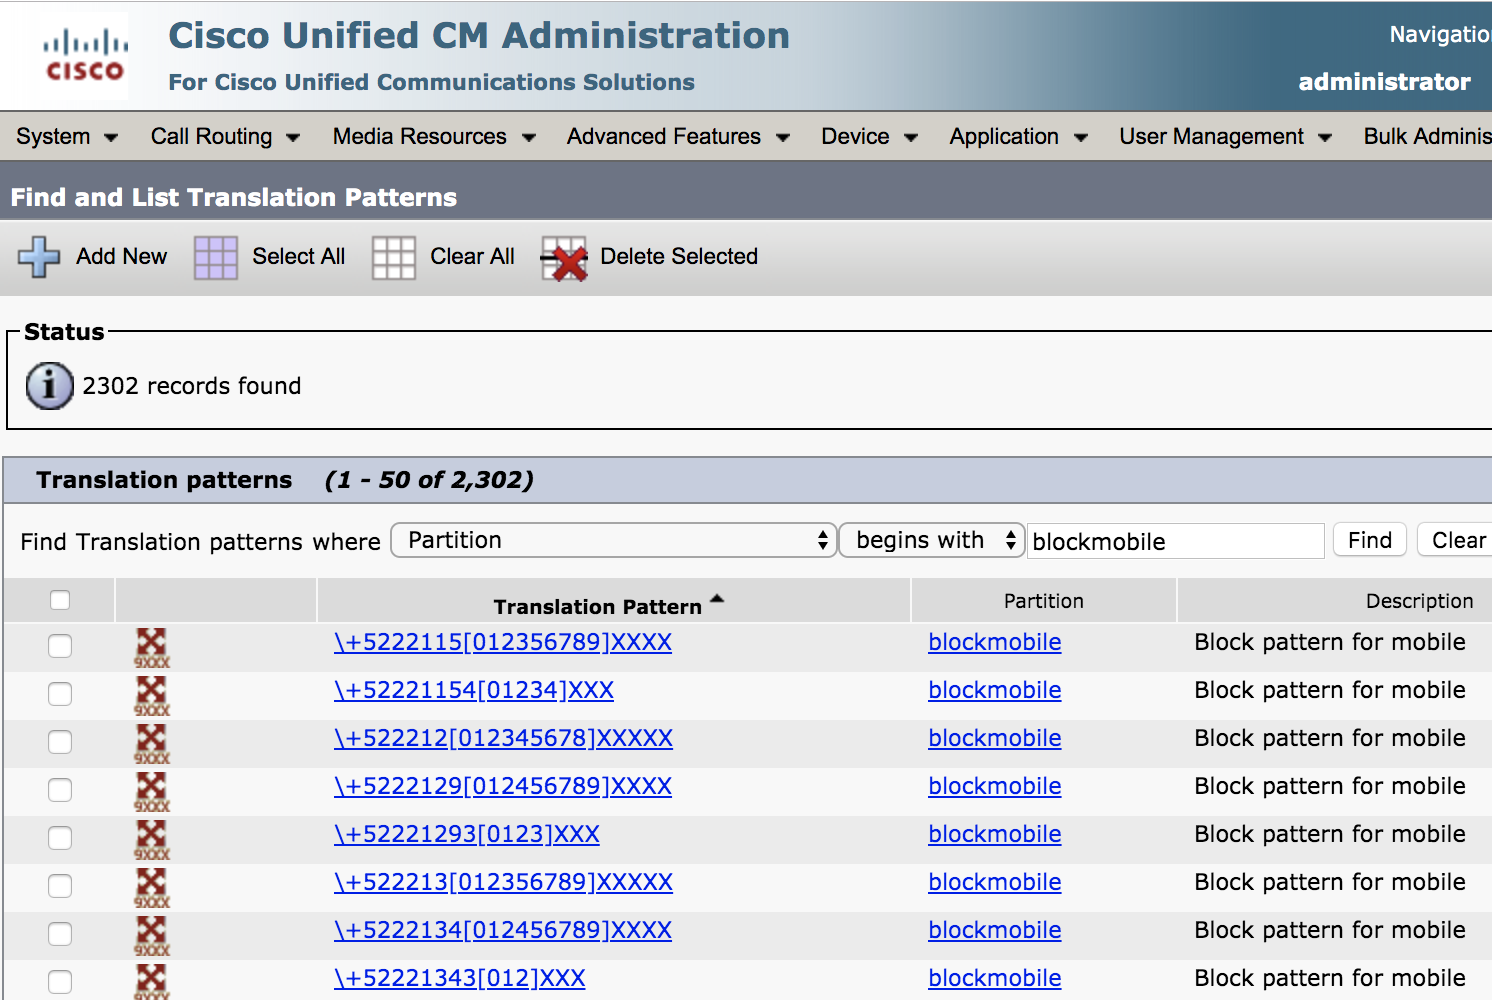

**To Do**: Try to figure out a simple way to delete all provisioned blocking translation patterns by using different call to `provison_patterns()`

Hint: `provison_patterns()` tries to always only apply the required add/remove operations to get to the new set of required patterns by comparing the set of existing patterns with the new set of patterns. What if the new set of patterns was empty?

In [ ]:
# insert your code here